### Data set clean: 
#### 1. nan value removing; 
#### 2. resize descending image to the same size of ascending image.

### **1. Remove nan values**

In [21]:
import os
os.chdir('..')
from notebooks import config
from utils.geotif_io import readTiff, writeTiff
from utils.imgShow import imgShow
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np


In [23]:
# idx = '03'
for id in range(0,37):    #
  idx = str(id+1).rjust(2,'0')
  print('process -> scene ' + idx)
  path_as = config.root_proj + '/data/dset/s1_ascend/scene'+ idx + '_s1as.tif'
  path_des = config.root_proj + '/data/dset/s1_descend/scene' + idx + '_s1des.tif'
  path_truth = config.root_proj + '/data/dset/s1_truth/scene' + idx + '_wat_truth.tif'
  s1_as, s1_as_info = readTiff(path_as)
  s1_des, s1_des_info = readTiff(path_des)
  truth, truth_info = readTiff(path_truth)
  print('ascending min and max:', s1_as.min(), s1_as.max())
  print('descending min and max:', s1_des.min(), s1_des.max())
  if np.isnan(s1_as.min()) or np.isnan(s1_as.max()):
    s1_as[np.isnan(s1_as)] = 0
    writeTiff(im_data = s1_as, 
        im_geotrans = s1_as_info['geotrans'], 
        im_geosrs = s1_as_info['geosrs'], 
        path_out = path_as)
    print('re-writen -> ', path_as)
  if np.isnan(s1_des.min()) or np.isnan(s1_des.max()):
    s1_des[np.isnan(s1_des)] = 0
    writeTiff(im_data = s1_des, 
        im_geotrans = s1_des_info['geotrans'], 
        im_geosrs = s1_des_info['geosrs'], 
        path_out = path_des)
    print('re-writen -> ', path_des)


process -> scene 01
ascending min and max: -59.30252 14.507791
descending min and max: -60.041367 15.51043
process -> scene 02
ascending min and max: -57.84405 18.891037
descending min and max: -58.96856 18.080645
process -> scene 03
ascending min and max: -64.49808 14.813437
descending min and max: -57.136032 13.171496
process -> scene 04
ascending min and max: -56.27784 12.523882
descending min and max: -63.255463 9.638974
process -> scene 05
ascending min and max: -55.134247 12.403475
descending min and max: -59.40671 10.064323
process -> scene 06
ascending min and max: -70.36879 10.679499
descending min and max: -60.272858 8.913513
process -> scene 07
ascending min and max: -64.86560097867738 16.52108816657322
descending min and max: -55.399366171311684 18.10975438766542
process -> scene 08
ascending min and max: -64.689514 20.897589
descending min and max: -56.394264 11.865823
process -> scene 09
ascending min and max: -62.274914 10.753989
descending min and max: -57.653057 11.410

#### Check images

check scene 24


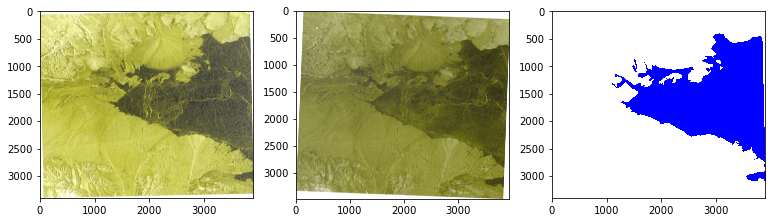

In [24]:
### check the scene and the truth
idx = '24'
print('check scene ' + idx)
path_as = config.root_proj + '/data/dset/s1_ascend/scene'+ idx + '_s1as.tif'
path_des = config.root_proj + '/data/dset/s1_descend/scene' + idx + '_s1des.tif'
path_truth = config.root_proj + '/data/dset/s1_truth/scene' + idx + '_wat_truth.tif'
s1_as, s1_as_info = readTiff(path_as)
s1_des, s1_des_info = readTiff(path_des)
truth, truth_info = readTiff(path_truth)
colors = ['white', 'blue']
cmap = mpl.colors.ListedColormap(colors)
plt.figure(figsize=(13,6))
plt.subplot(1,3,1)
imgShow(s1_as, color_bands=(0,0,1), clip_percent=5, per_band_clip='True')
plt.subplot(1,3,2)
imgShow(s1_des, color_bands=(0,0,1), clip_percent=5, per_band_clip='True')
plt.subplot(1,3,3)
plt.imshow(truth, cmap=cmap)


### **2. Resize descending image same to ascending image**

In [37]:
# idx = '24'
for id in range(0,37):    #
  idx = str(id+1).rjust(2,'0')
  print('check -> scene ' + idx)
  path_as = config.root_proj + '/data/dset/s1_ascend/scene'+ idx + '_s1as.tif'
  path_des = config.root_proj + '/data/dset/s1_descend/scene' + idx + '_s1des.tif'
  path_truth = config.root_proj + '/data/dset/s1_truth/scene' + idx + '_wat_truth.tif'
  s1_as, s1_as_info = readTiff(path_as)
  s1_des, s1_des_info = readTiff(path_des)
  truth, truth_info = readTiff(path_truth)
  dif_row = s1_as_info['row']-s1_des_info['row']
  dif_col = s1_as_info['col']-s1_des_info['col']
  print('shape difference(row, col):', dif_row, dif_col)
  if dif_row !=0 or dif_col !=0:
    width=s1_as_info['col']
    height=s1_as_info['row']
    path_out=path_des.split('.')[0]+'_resize.tif'
    !gdalwarp -co COMPRESS=LZW -ts $width $height -r near $path_des $path_out    # resize raster
    os.remove(path_des)
    os.rename(path_out,path_des)
    print('re-writen -> ', path_des)


check -> scene 01
shape difference(row, col): 0 0
check -> scene 02
shape difference(row, col): 0 0
check -> scene 03
shape difference(row, col): 0 0
check -> scene 04
shape difference(row, col): 0 0
check -> scene 05
shape difference(row, col): 0 0
check -> scene 06
shape difference(row, col): 0 0
check -> scene 07
shape difference(row, col): 0 0
check -> scene 08
shape difference(row, col): 0 0
check -> scene 09
shape difference(row, col): 0 0
check -> scene 10
shape difference(row, col): 0 0
check -> scene 11
shape difference(row, col): 0 0
check -> scene 12
shape difference(row, col): 0 0
check -> scene 13
shape difference(row, col): 0 0
check -> scene 14
shape difference(row, col): 0 0
check -> scene 15
shape difference(row, col): 0 0
check -> scene 16
shape difference(row, col): 0 0
check -> scene 17
shape difference(row, col): 0 0
check -> scene 18
shape difference(row, col): 0 0
check -> scene 19
shape difference(row, col): 0 0
check -> scene 20
shape difference(row, col): 0 0


### Check

check scene33
shape difference(row, col): 0 0


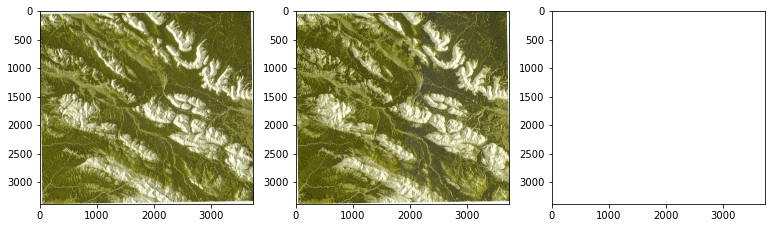

In [36]:
### check the scene and the truth
idx = '33'
print('check scene' + idx)
path_as = config.root_proj + '/data/dset/s1_ascend/scene'+ idx + '_s1as.tif'
path_des = config.root_proj + '/data/dset/s1_descend/scene' + idx + '_s1des.tif'
path_truth = config.root_proj + '/data/dset/s1_truth/scene' + idx + '_wat_truth.tif'
s1_as, s1_as_info = readTiff(path_as)
s1_des, s1_des_info = readTiff(path_des)
truth, truth_info = readTiff(path_truth)
dif_row = s1_as_info['row']-s1_des_info['row']
dif_col = s1_as_info['col']-s1_des_info['col']
print('shape difference(row, col):', dif_row, dif_col)
colors = ['white', 'blue']
cmap = mpl.colors.ListedColormap(colors)
plt.figure(figsize=(13,6))
plt.subplot(1,3,1)
imgShow(s1_as, color_bands=(0,0,1), clip_percent=2, per_band_clip='True')
plt.subplot(1,3,2)
imgShow(s1_des, color_bands=(0,0,1), clip_percent=2, per_band_clip='True')
plt.subplot(1,3,3)
plt.imshow(truth, cmap=cmap)

